# Get Data

In [1]:
import pandas as pd

file_path = '../data/processed/UpstoxData.pkl'

combined_df = pd.read_pickle(file_path)

In [2]:
# Identify unique symbols where the volume is less than zero
symbols_to_remove = combined_df[combined_df['volume'] < 0]['symbol'].unique()

# Filter the original DataFrame to exclude the rows with these symbols
combined_df = combined_df[~combined_df['symbol'].isin(symbols_to_remove)]
# manual_symbols = [
#     'RELIANCE', 'TCS', 'HDFCBANK', 'INFY', 'HINDUNILVR',
#     'HDFC', 'ICICIBANK', 'KOTAKBANK', 'SBIN', 'BAJFINANCE',
#     'BHARTIARTL', 'ITC', 'ASIANPAINT', 'LT', 'WIPRO',
#     'AXISBANK', 'MARUTI', 'ONGC', 'SUNPHARMA', 'HCLTECH',
#     # 'HINDALCO', 'SHREECEM', 'TECHM', 'NTPC', 'TITAN',
#     # 'HEROMOTOCO', 'COALINDIA', 'BRITANNIA', 'DRREDDY',
#     'BAJAJFINSV', 'BAJAJHLDNG', 'CIPLA', 'EICHERMOT',
#     'ZOMATO'
#     ]

# combined_df = combined_df[combined_df['symbol'].isin(manual_symbols)]
# Sort the DataFrame first by 'symbol' and then by 'date', both in ascending order
combined_df = combined_df.sort_values(by=['symbol', 'date'], ascending=[True, True]).reset_index(drop=True)


# Add Indicators

In [3]:
import talib
import pandas as pd

# Function to apply TA-Lib indicators
def apply_talib_indicators(group_df):
    if group_df.empty:
        print("Received an empty DataFrame.")
        return pd.DataFrame()

    # Prices and volume
    close = group_df['close'].astype(float).to_numpy()
    high = group_df['high'].astype(float).to_numpy()
    low = group_df['low'].astype(float).to_numpy()
    volume = group_df['volume'].astype(float).to_numpy()
    open = group_df['open'].astype(float).to_numpy()

    indicators = {}

    # Trend Indicators
    indicators['SMA'] = talib.SMA(close, timeperiod=10)
    indicators['EMA'] = talib.EMA(close, timeperiod=20)
    indicators['SAR'] = talib.SAR(high, low, acceleration=0.02, maximum=0.2)
    indicators['ADX'] = talib.ADX(high, low, close, timeperiod=14)
    indicators['ADXR'] = talib.ADXR(high, low, close, timeperiod=14)
    indicators['APO'] = talib.APO(close, fastperiod=12, slowperiod=26, matype=0)
    aroondown, aroonup = talib.AROON(high, low, timeperiod=14)
    indicators['AROON_DOWN'] = aroondown
    indicators['AROON_UP'] = aroonup
    indicators['AROONOSC'] = talib.AROONOSC(high, low, timeperiod=14)
    indicators['ATR'] = talib.ATR(high, low, close, timeperiod=14)
    indicators['AVGPRICE'] = talib.AVGPRICE(open, high, low, close)
    upperband, middleband, lowerband = talib.BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    indicators['Bollinger_Upper'] = upperband
    indicators['Bollinger_Lower'] = lowerband
    indicators['BETA'] = talib.BETA(high, low, timeperiod=5)
    indicators['BOP'] = talib.BOP(open, high, low, close)
    indicators['CCI'] = talib.CCI(high, low, close, timeperiod=14)
    
    # Candlestick Patterns
    patterns = {
        'CDL2CROWS': talib.CDL2CROWS,
        'CDL3BLACKCROWS': talib.CDL3BLACKCROWS,
        'CDL3INSIDE': talib.CDL3INSIDE,
        'CDL3LINESTRIKE': talib.CDL3LINESTRIKE,
        'CDL3STARSINSOUTH': talib.CDL3STARSINSOUTH,
        'CDL3WHITESOLDIERS': talib.CDL3WHITESOLDIERS,
        'CDLABANDONEDBABY': talib.CDLABANDONEDBABY,
        'CDLADVANCEBLOCK': talib.CDLADVANCEBLOCK,
        'CDLBELTHOLD': talib.CDLBELTHOLD,
        'CDLBREAKAWAY': talib.CDLBREAKAWAY,
        'CDLCLOSINGMARUBOZU': talib.CDLCLOSINGMARUBOZU,
        'CDLCONCEALBABYSWALL': talib.CDLCONCEALBABYSWALL,
        'CDLCOUNTERATTACK': talib.CDLCOUNTERATTACK,
        'CDLDARKCLOUDCOVER': talib.CDLDARKCLOUDCOVER,
        'CDLDOJI': talib.CDLDOJI,
        'CDLDOJISTAR': talib.CDLDOJISTAR,
        'CDLDRAGONFLYDOJI': talib.CDLDRAGONFLYDOJI,
        'CDLENGULFING': talib.CDLENGULFING,
        'CDLEVENINGDOJISTAR': talib.CDLEVENINGDOJISTAR,
        'CDLEVENINGSTAR': talib.CDLEVENINGSTAR,
        'CDLGAPSIDESIDEWHITE': talib.CDLGAPSIDESIDEWHITE,
        'CDLGRAVESTONEDOJI': talib.CDLGRAVESTONEDOJI,
        'CDLHAMMER': talib.CDLHAMMER,
        'CDLHANGINGMAN': talib.CDLHANGINGMAN,
        'CDLHARAMI': talib.CDLHARAMI,
        'CDLHARAMICROSS': talib.CDLHARAMICROSS,
        'CDLHIGHWAVE': talib.CDLHIGHWAVE,
        'CDLHIKKAKE': talib.CDLHIKKAKE,
        'CDLHIKKAKEMOD': talib.CDLHIKKAKEMOD,
        'CDLHOMINGPIGEON': talib.CDLHOMINGPIGEON,
        'CDLIDENTICAL3CROWS': talib.CDLIDENTICAL3CROWS,
        'CDLINNECK': talib.CDLINNECK,
        'CDLINVERTEDHAMMER': talib.CDLINVERTEDHAMMER,
        'CDLKICKING': talib.CDLKICKING,
        'CDLKICKINGBYLENGTH': talib.CDLKICKINGBYLENGTH,
        'CDLLADDERBOTTOM': talib.CDLLADDERBOTTOM,
        'CDLLONGLEGGEDDOJI': talib.CDLLONGLEGGEDDOJI,
        'CDLLONGLINE': talib.CDLLONGLINE,
        'CDLMARUBOZU': talib.CDLMARUBOZU,
        'CDLMATCHINGLOW': talib.CDLMATCHINGLOW,
        'CDLMATHOLD': talib.CDLMATHOLD,
        'CDLMORNINGDOJISTAR': talib.CDLMORNINGDOJISTAR,
        'CDLMORNINGSTAR': talib.CDLMORNINGSTAR,
        'CDLONNECK': talib.CDLONNECK,
        'CDLPIERCING': talib.CDLPIERCING,
        'CDLRICKSHAWMAN': talib.CDLRICKSHAWMAN,
        'CDLRISEFALL3METHODS': talib.CDLRISEFALL3METHODS,
        'CDLSEPARATINGLINES': talib.CDLSEPARATINGLINES,
        'CDLSHOOTINGSTAR': talib.CDLSHOOTINGSTAR,
        'CDLSHORTLINE': talib.CDLSHORTLINE,
        'CDLSPINNINGTOP': talib.CDLSPINNINGTOP,
        'CDLSTALLEDPATTERN': talib.CDLSTALLEDPATTERN,
        'CDLSTICKSANDWICH': talib.CDLSTICKSANDWICH,
        'CDLTAKURI': talib.CDLTAKURI,
        'CDLTASUKIGAP': talib.CDLTASUKIGAP,
        'CDLTHRUSTING': talib.CDLTHRUSTING,
        'CDLTRISTAR': talib.CDLTRISTAR,
        'CDLUNIQUE3RIVER': talib.CDLUNIQUE3RIVER,
        'CDLUPSIDEGAP2CROWS': talib.CDLUPSIDEGAP2CROWS,
        'CDLXSIDEGAP3METHODS': talib.CDLXSIDEGAP3METHODS
    }

    for pattern_name, pattern_func in patterns.items():
        indicators[pattern_name] = pattern_func(open, high, low, close)
    
    # Momentum Indicators
    indicators['RSI'] = talib.RSI(close, timeperiod=14)
    macd, macd_signal, _ = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
    indicators['MACD'] = macd
    indicators['MACD_signal'] = macd_signal
    indicators['ROC'] = talib.ROC(close, timeperiod=10)
    indicators['CMO'] = talib.CMO(close, timeperiod=14)
    indicators['MFI'] = talib.MFI(high, low, close, volume, timeperiod=14)
    indicators['MOM'] = talib.MOM(close, timeperiod=10)
    indicators['PPO'] = talib.PPO(close, fastperiod=12, slowperiod=26, matype=0)
    indicators['ROCP'] = talib.ROCP(close, timeperiod=10)
    indicators['ROCR'] = talib.ROCR(close, timeperiod=10)
    indicators['ROCR100'] = talib.ROCR100(close, timeperiod=10)
    indicators['TRIX'] = talib.TRIX(close, timeperiod=30)
    indicators['ULTOSC'] = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
    indicators['WILLR'] = talib.WILLR(high, low, close, timeperiod=14)

    # Volatility Indicators
    indicators['NATR'] = talib.NATR(high, low, close, timeperiod=14)
    indicators['TRANGE'] = talib.TRANGE(high, low, close)

    # Volume Indicators
    indicators['OBV'] = talib.OBV(close, volume)
    indicators['ADL'] = talib.AD(high, low, close, volume)
    indicators['ADOSC'] = talib.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
    indicators['AD'] = talib.AD(high, low, close, volume)

    # Price Transform
    indicators['AVGPRICE'] = talib.AVGPRICE(open, high, low, close)
    indicators['MEDPRICE'] = talib.MEDPRICE(high, low)
    indicators['TYPPRICE'] = talib.TYPPRICE(high, low, close)
    indicators['WCLPRICE'] = talib.WCLPRICE(high, low, close)

    # Cycle Indicators
    indicators['HT_DCPERIOD'] = talib.HT_DCPERIOD(close)
    indicators['HT_DCPHASE'] = talib.HT_DCPHASE(close)
    inphase, quadrature = talib.HT_PHASOR(close)
    indicators['HT_PHASOR_inphase'] = inphase
    indicators['HT_PHASOR_quadrature'] = quadrature
    sine, leadsine = talib.HT_SINE(close)
    indicators['HT_SINE'] = sine
    indicators['HT_LEADSINE'] = leadsine
    indicators['HT_TRENDLINE'] = talib.HT_TRENDLINE(close)
    indicators['HT_TRENDMODE'] = talib.HT_TRENDMODE(close)

    # Create DataFrame from indicators
    indicators_df = pd.DataFrame(indicators, index=group_df.index)

    # Concatenate the original DataFrame with the indicators DataFrame
    group_df = pd.concat([group_df, indicators_df], axis=1)

    # Create target variable
    group_df['y'] = group_df['close'].shift(-1)  # Calculate percentage change and shift to align with the next day

    return group_df

feature_columns = [
    'SMA', 'EMA', 'SAR', 'ADX', 'ADXR', 'APO', 'AROON_DOWN', 'AROON_UP', 'AROONOSC', 'ATR', 'AVGPRICE',
    'Bollinger_Upper', 'Bollinger_Lower', 'BETA', 'BOP', 'CCI', 'RSI', 'MACD', 'MACD_signal', 'ROC', 'CMO',
    'MFI', 'MOM', 'PPO', 'ROCP', 'ROCR', 'ROCR100', 'TRIX', 'ULTOSC', 'WILLR', 'NATR', 'TRANGE', 'OBV', 'ADL',
    'ADOSC', 'AD', 'MEDPRICE', 'TYPPRICE', 'WCLPRICE', 'HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR_inphase',
    'HT_PHASOR_quadrature', 'HT_SINE', 'HT_LEADSINE', 'HT_TRENDLINE', 'HT_TRENDMODE', 'CDL2CROWS', 'CDL3BLACKCROWS',
    'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK',
    'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER',
    'CDLDOJI', 'CDLDOJISTAR', 'CDLDRAGONFLYDOJI', 'CDLENGULFING', 'CDLEVENINGDOJISTAR', 'CDLEVENINGSTAR', 'CDLGAPSIDESIDEWHITE',
    'CDLGRAVESTONEDOJI', 'CDLHAMMER', 'CDLHANGINGMAN', 'CDLHARAMI', 'CDLHARAMICROSS', 'CDLHIGHWAVE', 'CDLHIKKAKE', 'CDLHIKKAKEMOD',
    'CDLHOMINGPIGEON', 'CDLIDENTICAL3CROWS', 'CDLINNECK', 'CDLINVERTEDHAMMER', 'CDLKICKING', 'CDLKICKINGBYLENGTH', 'CDLLADDERBOTTOM',
    'CDLLONGLEGGEDDOJI', 'CDLLONGLINE', 'CDLMARUBOZU', 'CDLMATCHINGLOW', 'CDLMATHOLD', 'CDLMORNINGDOJISTAR', 'CDLMORNINGSTAR',
    'CDLONNECK', 'CDLPIERCING', 'CDLRICKSHAWMAN', 'CDLRISEFALL3METHODS', 'CDLSEPARATINGLINES', 'CDLSHOOTINGSTAR', 'CDLSHORTLINE',
    'CDLSPINNINGTOP', 'CDLSTALLEDPATTERN', 'CDLSTICKSANDWICH', 'CDLTAKURI', 'CDLTASUKIGAP', 'CDLTHRUSTING', 'CDLTRISTAR',
    'CDLUNIQUE3RIVER', 'CDLUPSIDEGAP2CROWS', 'CDLXSIDEGAP3METHODS'
]


In [4]:
from tqdm import tqdm
# Apply the TA-Lib indicators function to each group and concatenate the results with progress bar
result_dfs = []
for symbol, group_df in tqdm(combined_df.groupby('symbol'), desc="Processing tickers"):
    result_dfs.append(apply_talib_indicators(group_df))

# Concatenate the results
result_df = pd.concat(result_dfs)

result_pd = result_df.reset_index(drop=True)

result_pd.to_pickle('../data/processed/UpstoxDataWithIndicators.pkl')

C:\Users\adi10\AppData\Local\Temp\ipykernel_11196\1494509322.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for symbol, group_df in tqdm(combined_df.groupby('symbol'), desc="Processing tickers"):
Processing tickers:  38%|███▊      | 863/2257 [00:09<00:16, 86.48it/s] 

Received an empty DataFrame.


Processing tickers:  41%|████▏     | 935/2257 [00:10<00:12, 104.34it/s]

Received an empty DataFrame.


Processing tickers:  70%|██████▉   | 1571/2257 [00:17<00:06, 107.29it/s]

Received an empty DataFrame.


Processing tickers: 100%|██████████| 2257/2257 [00:24<00:00, 92.67it/s] 


In [3]:
import talib
import pandas as pd
from tqdm import tqdm
import numpy as np

# Function to apply TA-Lib indicators
def apply_talib_indicators(group_df):

    if group_df.empty:
        print("Received an empty DataFrame.")
        return pd.DataFrame()
    # Prices and volume
    close = group_df['close'].astype(float).to_numpy()
    high = group_df['high'].astype(float).to_numpy()
    low = group_df['low'].astype(float).to_numpy()
    volume = group_df['volume'].astype(float).to_numpy()

    # Trend Indicators
    group_df['SMA'] = talib.SMA(close, timeperiod=10)
    group_df['EMA'] = talib.EMA(close, timeperiod=20)
    group_df['SAR'] = talib.SAR(high, low, acceleration=0.02, maximum=0.2)

    # Momentum Indicators
    group_df['RSI'] = talib.RSI(close, timeperiod=14)
    macd, macd_signal, _ = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
    group_df['MACD'] = macd
    group_df['MACD_signal'] = macd_signal
    group_df['ROC'] = talib.ROC(close, timeperiod=10)

    # Volatility Indicators
    group_df['ATR'] = talib.ATR(high, low, close, timeperiod=14)
    upperband, middleband, lowerband = talib.BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    group_df['Bollinger_Upper'] = upperband
    group_df['Bollinger_Lower'] = lowerband

    # Volume Indicators
    group_df['OBV'] = talib.OBV(close, volume)
    group_df['ADL'] = talib.AD(high, low, close, volume)
    # Create target variable
    group_df['y'] = group_df['close'].shift(-1)#.pct_change()  # Calculate percentage change and shift to align with the next day
    return group_df

feature_columns = [
    'SMA',  # Simple Moving Average
    'EMA',  # Exponential Moving Average
    'SAR',  # Parabolic SAR
    'RSI',  # Relative Strength Index
    'MACD',  # Moving Average Convergence Divergence
    'MACD_signal',  # Signal line for MACD
    'ROC',  # Rate of Change
    'ATR',  # Average True Range
    'Bollinger_Upper',  # Upper Bollinger Band
    'Bollinger_Lower',  # Lower Bollinger Band
    'OBV',  # On-Balance Volume
    'ADL'   # Accumulation Distribution Line
]


# Apply the TA-Lib indicators function to each group and concatenate the results with progress bar
result_dfs = []
for symbol, group_df in tqdm(combined_df.groupby('symbol'), desc="Processing tickers"):
    result_dfs.append(apply_talib_indicators(group_df))

# Concatenate the results
result_df = pd.concat(result_dfs)

result_pd = result_df.reset_index(drop=True)

result_pd.to_pickle('../data/processed/UpstoxDataWithIndicators.pkl')

C:\Users\adi10\AppData\Local\Temp\ipykernel_11820\2489694105.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for symbol, group_df in tqdm(combined_df.groupby('symbol'), desc="Processing tickers"):
Processing tickers:  41%|████      | 928/2256 [00:02<00:03, 378.46it/s]

Received an empty DataFrame.
Received an empty DataFrame.


Processing tickers:  72%|███████▏  | 1624/2256 [00:04<00:01, 357.31it/s]

Received an empty DataFrame.


Processing tickers: 100%|██████████| 2256/2256 [00:06<00:00, 348.82it/s]


# Train and Save Model

In [1]:
# Define categorical and numerical columns
feature_columns = [
    'SMA', 'EMA', 'SAR', 'ADX', 'ADXR', 'APO', 'AROON_DOWN', 'AROON_UP', 'AROONOSC', 'ATR', 'AVGPRICE',
    'Bollinger_Upper', 'Bollinger_Lower', 'BETA', 'BOP', 'CCI', 'RSI', 'MACD', 'MACD_signal', 'ROC', 'CMO',
    'MFI', 'MOM', 'PPO', 'ROCP', 'ROCR', 'ROCR100', 'TRIX', 'ULTOSC', 'WILLR', 'NATR', 'TRANGE', 'OBV', 'ADL',
    'ADOSC', 'AD', 'MEDPRICE', 'TYPPRICE', 'WCLPRICE', 'HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR_inphase',
    'HT_PHASOR_quadrature', 'HT_SINE', 'HT_LEADSINE', 'HT_TRENDLINE', 'HT_TRENDMODE', 'CDL2CROWS', 'CDL3BLACKCROWS',
    'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK',
    'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER',
    'CDLDOJI', 'CDLDOJISTAR', 'CDLDRAGONFLYDOJI', 'CDLENGULFING', 'CDLEVENINGDOJISTAR', 'CDLEVENINGSTAR', 'CDLGAPSIDESIDEWHITE',
    'CDLGRAVESTONEDOJI', 'CDLHAMMER', 'CDLHANGINGMAN', 'CDLHARAMI', 'CDLHARAMICROSS', 'CDLHIGHWAVE', 'CDLHIKKAKE', 'CDLHIKKAKEMOD',
    'CDLHOMINGPIGEON', 'CDLIDENTICAL3CROWS', 'CDLINNECK', 'CDLINVERTEDHAMMER', 'CDLKICKING', 'CDLKICKINGBYLENGTH', 'CDLLADDERBOTTOM',
    'CDLLONGLEGGEDDOJI', 'CDLLONGLINE', 'CDLMARUBOZU', 'CDLMATCHINGLOW', 'CDLMATHOLD', 'CDLMORNINGDOJISTAR', 'CDLMORNINGSTAR',
    'CDLONNECK', 'CDLPIERCING', 'CDLRICKSHAWMAN', 'CDLRISEFALL3METHODS', 'CDLSEPARATINGLINES', 'CDLSHOOTINGSTAR', 'CDLSHORTLINE',
    'CDLSPINNINGTOP', 'CDLSTALLEDPATTERN', 'CDLSTICKSANDWICH', 'CDLTAKURI', 'CDLTASUKIGAP', 'CDLTHRUSTING', 'CDLTRISTAR',
    'CDLUNIQUE3RIVER', 'CDLUPSIDEGAP2CROWS', 'CDLXSIDEGAP3METHODS'
]
categorical_columns = [
    'CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS',
    'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL',
    'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR', 'CDLDRAGONFLYDOJI', 'CDLENGULFING',
    'CDLEVENINGDOJISTAR', 'CDLEVENINGSTAR', 'CDLGAPSIDESIDEWHITE', 'CDLGRAVESTONEDOJI', 'CDLHAMMER', 'CDLHANGINGMAN',
    'CDLHARAMI', 'CDLHARAMICROSS', 'CDLHIGHWAVE', 'CDLHIKKAKE', 'CDLHIKKAKEMOD', 'CDLHOMINGPIGEON', 'CDLIDENTICAL3CROWS',
    'CDLINNECK', 'CDLINVERTEDHAMMER', 'CDLKICKING', 'CDLKICKINGBYLENGTH', 'CDLLADDERBOTTOM', 'CDLLONGLEGGEDDOJI',
    'CDLLONGLINE', 'CDLMARUBOZU', 'CDLMATCHINGLOW', 'CDLMATHOLD', 'CDLMORNINGDOJISTAR', 'CDLMORNINGSTAR',
    'CDLONNECK', 'CDLPIERCING', 'CDLRICKSHAWMAN', 'CDLRISEFALL3METHODS', 'CDLSEPARATINGLINES', 'CDLSHOOTINGSTAR',
    'CDLSHORTLINE', 'CDLSPINNINGTOP', 'CDLSTALLEDPATTERN', 'CDLSTICKSANDWICH', 'CDLTAKURI', 'CDLTASUKIGAP',
    'CDLTHRUSTING', 'CDLTRISTAR', 'CDLUNIQUE3RIVER', 'CDLUPSIDEGAP2CROWS', 'CDLXSIDEGAP3METHODS'
]
numerical_columns = [col for col in feature_columns if col not in categorical_columns]

In [2]:
from sklearn.feature_selection import RFE
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd

# Separate feature selection step
def run_rfe(x_pd, y, estimator, n_features_to_select):
    rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select, step=1, verbose=2)
    rfe.fit(x_pd, y)
    return rfe.support_

# Load data
result_pd = pd.read_pickle('../data/processed/UpstoxDataWithIndicators.pkl').dropna()
x_pd = result_pd[feature_columns]
y = result_pd['y']  # Ensure you have the target variable defined

# Run RFE with CatBoostRegressor (or any other regressor of your choice)
selected_features_mask = run_rfe(x_pd, y, CatBoostRegressor(iterations=5, learning_rate=0.3, depth=2, thread_count=-1, verbose=2), n_features_to_select=30)

# Get the selected feature names
selected_features = x_pd.columns[selected_features_mask]

print("Selected features:", selected_features)


Fitting estimator with 107 features.
0:	learn: 1767.0154193	total: 799ms	remaining: 3.2s
2:	learn: 1380.0456052	total: 2.5s	remaining: 1.66s
4:	learn: 1225.0568205	total: 4.16s	remaining: 0us
Fitting estimator with 106 features.
0:	learn: 1767.2447123	total: 532ms	remaining: 2.13s
2:	learn: 1381.7098990	total: 1.39s	remaining: 923ms
4:	learn: 1226.2157943	total: 2.23s	remaining: 0us
Fitting estimator with 105 features.
0:	learn: 1768.2868050	total: 422ms	remaining: 1.69s
2:	learn: 1381.5281793	total: 1.26s	remaining: 843ms
4:	learn: 1227.0242393	total: 2.1s	remaining: 0us
Fitting estimator with 104 features.
0:	learn: 1767.1187491	total: 448ms	remaining: 1.79s
2:	learn: 1381.4585084	total: 1.31s	remaining: 873ms
4:	learn: 1226.2743235	total: 2.22s	remaining: 0us
Fitting estimator with 103 features.
0:	learn: 1767.3320976	total: 436ms	remaining: 1.74s
2:	learn: 1381.6170645	total: 1.23s	remaining: 821ms
4:	learn: 1226.3186225	total: 2.05s	remaining: 0us
Fitting estimator with 102 featur

In [1]:
feature_columns = ['SAR','ADX','ATR', 'AVGPRICE', 'Bollinger_Lower','Bollinger_Upper', 'BOP', 'CCI', 'RSI', 'MACD','ROC',
       'MFI', 'WILLR', 'NATR', 'TRANGE', 'OBV', 'ADL', 'AD', 'MEDPRICE', 'TYPPRICE', 'MOM', 'CMO', 'ULTOSC','ADOSC',
       'WCLPRICE']
numerical_columns = feature_columns

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearnex import patch_sklearn
from sklearn import set_config
import numpy as np
import pandas as pd
import logging
from tqdm import tqdm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_regression, mutual_info_classif


patch_sklearn()
set_config(transform_output="pandas")

# Preprocessing for numerical data
numerical_pipeline = Pipeline([
    ('robust_scaler', RobustScaler()),
    ('minmax_scaler', MinMaxScaler()),
    # ('selectkbest', SelectKBest(score_func=mutual_info_regression, k=10,))
])

# Preprocessing for categorical data
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('selectkbest', SelectKBest(score_func=mutual_info_classif, k=10))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns)
    ('cat', categorical_pipeline, categorical_columns)
])


# Assuming logging is desired
# logging.basicConfig(level=logging.INFO)


# Define the regressors
regressors = {
    'random_forest': RandomForestRegressor(n_estimators=32, n_jobs=-1, random_state=42, verbose=2),
    'catboost': CatBoostRegressor(iterations=1000, learning_rate=0.3, depth=10, thread_count=-1, verbose=100)
}

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressors['random_forest'])
])
result_pd = pd.read_pickle('../data/processed/UpstoxDataWithIndicators.pkl').dropna()
x_pd = result_pd[feature_columns]


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
X = x_pd#.astype('float32').values
y = result_pd['y']#.astype('float32').values.ravel()
# Split the aggregated data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train the model on the entire dataset
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 28.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  32 out of  32 | elapsed:   13.5s finished


In [4]:
y_test = y_test.values

Mean Absolute Error (MAE): 6.4996720374912025
Mean Squared Error (MSE): 710.7302663586412
R-squared (R²): 0.9991767793802934
Root Mean Squared Error (RMSE): 26.659524871209562
Mean Absolute Percentage Error (MAPE): 2.594520876599251


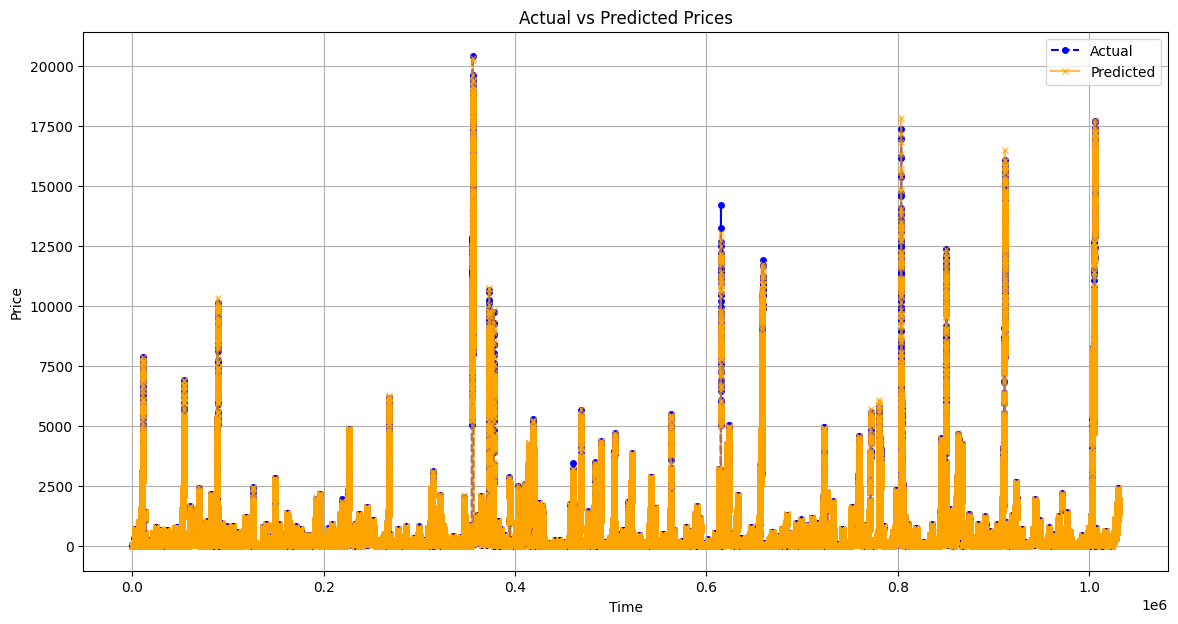

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)


# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))

# Plot all data points
plt.plot(y_test, label='Actual', color='blue', marker='o', markersize=4, linestyle='dashed')
plt.plot(y_pred, label='Predicted', color='orange', alpha=0.7, marker='x', markersize=4)

plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Evaluate the model
# from sklearn.metrics import accuracy_score, classification_report
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print(classification_report(y_test, y_pred))


In [7]:
from joblib import dump, load

model_filename = f'../data/models/model_rf_two_scalars_multiplefeatures_25_feature_selection_32_estimators.joblib'
dump(pipeline, model_filename)


['../data/models/model_rf_two_scalars_multiplefeatures_25_feature_selection_32_estimators.joblib']

# Make Predictions

In [1]:
import configparser
config = configparser.ConfigParser()
config.read('../data/config.ini')
model_selected = config.get('parameter', 'model_selected')
feature_columns_str = config.get(model_selected, "feature_columns")
feature_columns = feature_columns_str.strip().split(",")

feature_columns


['SMA',
 'EMA',
 'SAR',
 'RSI',
 'MACD',
 'MACD_signal',
 'ROC',
 'ATR',
 'Bollinger_Upper',
 'Bollinger_Lower',
 'OBV',
 'ADL']

In [2]:
import pandas as pd
# Load the dataset you want to make predictions on
# Make sure to process this dataframe the same way as the training data
data_path = '../data/processed/UpstoxDataWithIndicators.pkl'
data_df = pd.read_pickle(data_path)
data_df = data_df[feature_columns].dropna()


In [3]:
from joblib import load
from sklearnex import patch_sklearn
patch_sklearn()
import configparser
config = configparser.ConfigParser()
config.read('../data/config.ini')
model_selected = config.get('parameter', 'model_selected')
# Load your pre-trained model
model_path = f'../data/models/{model_selected}.joblib'
model = load(model_path, mmap_mode='r+')


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
# Assuming 'data_df' is already preprocessed and ready for predictions
X = data_df.astype('float32').values   

# Make predictions
predictions = model.predict(X)

# Specify the path where you want to save the raw predictions
save_path = '../data/predictions/raw_predictions.pkl'
import pickle
# Save the raw predictions
with open(save_path, 'wb') as f:
    pickle.dump(predictions, f)


c:\Users\adi10\.conda\envs\trading_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\adi10\.conda\envs\trading_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   30.1s finished


# Create Dataframe

In [1]:
import configparser
config = configparser.ConfigParser()
config.read('../data/config.ini')
model_selected = config.get('parameter', 'model_selected')
feature_columns_str = config.get(model_selected, "feature_columns")
feature_columns = feature_columns_str.strip().split(",")

# Define the default columns list
default_cols = ['date', 'open', 'high', 'low', 'close', 'volume', 'symbol']

feature_columns_plus_default_cols = feature_columns + default_cols



In [2]:
import pandas as pd
import pickle
# Load raw predictions
with open('../data/predictions/raw_predictions.pkl', 'rb') as f:
    predictions = pickle.load(f)

data_path = '../data/processed/UpstoxDataWithIndicators.pkl'
data_df = pd.read_pickle(data_path)
predictions_df = data_df[feature_columns_plus_default_cols].copy()
predictions_df = predictions_df.dropna()
predictions_df['Predicted_Price'] = predictions

In [3]:
import numpy as np
from scipy.stats import zscore

def calculate_continuous_signals(close_prices, predicted_prices, sensitivity):
    if len(close_prices) < 2:
        return np.zeros_like(close_prices)  # Return zero signals if not enough data

    # Calculate log returns and volatility
    log_returns = np.log(close_prices[1:] / close_prices[:-1])
    if np.std(log_returns) == 0:
        volatilities = np.zeros_like(close_prices)
    else:
        volatilities = np.std(log_returns) * np.sqrt(252)  # Annualizing

    # Extend volatilities array to match the length of close_prices
    volatilities = np.full_like(close_prices, volatilities)

    # Calculate percentage differences and standardize by volatility
    percentage_differences = (predicted_prices - close_prices) / close_prices * 100
    standardized_differences = percentage_differences / volatilities

    # Handle cases where volatilities might be zero
    standardized_differences[volatilities == 0] = 0

    # Calculate z-scores to dynamically determine thresholds
    z_scores = zscore(standardized_differences, nan_policy='omit')

    # Continuous signals based on z-scores and sensitivity
    signals = z_scores / sensitivity

    return signals

def apply_signals_to_group(df_group, sensitivity=1):
    close_prices = df_group['close'].values
    predicted_prices = df_group['Predicted_Price'].values
    df_group['signal'] = calculate_continuous_signals(close_prices, predicted_prices, sensitivity)
    return df_group

# Example usage
signal_df = predictions_df.copy()
sensitivity = 0.5

# Apply the function to each group using groupby and apply
signal_df = signal_df.groupby('symbol').apply(apply_signals_to_group, sensitivity=sensitivity).reset_index(drop=True)

C:\Users\adi10\AppData\Local\Temp\ipykernel_16140\2610187601.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  signal_df = signal_df.groupby('symbol').apply(apply_signals_to_group, sensitivity=sensitivity).reset_index(drop=True)
C:\Users\adi10\AppData\Local\Temp\ipykernel_16140\2610187601.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  signal_df = signal_df.groupby('symbol').apply(apply_signals_to_group, sensitivity=sensitivity).reset_index(drop=True)


In [4]:
# Filter to get only rows where the signal is 10
signals_10_df = signal_df[signal_df['signal'] > 7]

# Group by date and count unique stocks providing a signal of 10
signals_10_count_per_day = signals_10_df.groupby('date').size()

# Calculate the average number of stocks providing a signal of 10 per day across all days
average_signals_10_per_day = signals_10_count_per_day.mean()
# Output the average
print(f"Average number of stocks with a signal of greater than 7 per day: {average_signals_10_per_day}")

Average number of stocks with a signal of greater than 7 per day: 8.39688622754491


In [5]:
signal_df.to_pickle('../data/predictions/predictions.pkl')

In [1]:
import pandas as pd
import datetime

# Step 1: Convert 'date' column to datetime
signal_df['date'] = pd.to_datetime(signal_df['date'],errors='coerce')

# Step 2: Determine the date 20 days ago
twenty_days_ago = datetime.datetime.now() - datetime.timedelta(days=20)

# Step 3: Filter rows within the last twenty days
filtered_df = signal_df[signal_df['date'] >= twenty_days_ago]

# Step 4: Sort by 'signal'
sorted_df = filtered_df.sort_values(by='signal', ascending=False)

# Step 5: Get the maximum date in the DataFrame
max_date = sorted_df['date'].max().strftime('%Y-%m-%d')

print(f"Maximum date: {max_date}")

sorted_df.to_excel(f'../data/predictions/excel_output/{max_date}.xlsx', index=False)

NameError: name 'signal_df' is not defined